In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

import seaborn as sns

#### Hotel

In [2]:
df1 = pd.read_csv("preprocess_dataset/datasets/preparation_of_datasets/hotel/new_vader/hotel_bert_emb_pca16_senti.csv")
print(df1.shape)
df1.head(2)

(9998, 24)


,user,item,label,reviews,vader_negations,vader_sentiment_score,review_emb1,review_emb2,review_emb3,review_emb4,...,review_emb9,review_emb10,review_emb11,review_emb12,review_emb13,review_emb14,review_emb15,review_emb16,negation_occurrence,sentiment
0,1,1,5,Our experience at Rancho Valencia was absolute...,0,0.5505,-0.656163,0.424873,0.762262,0.025274,...,-0.421525,0.562342,0.273749,0.296355,-0.453175,0.053611,-0.703869,-0.146955,0,1
1,2,1,5,Amazing place. Everyone was extremely warm and...,0,0.4447,-0.640279,-0.745944,-1.155962,-0.188190,...,-0.440387,0.371404,-0.132081,0.141466,-0.395520,-0.619036,-0.464379,0.233842,0,1


In [6]:
df1.describe()

,user,item,label,vader_negations,vader_sentiment_score,review_emb1,review_emb2,review_emb3,review_emb4,review_emb5,...,review_emb9,review_emb10,review_emb11,review_emb12,review_emb13,review_emb14,review_emb15,review_emb16,negation_occurrence,sentiment
count,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,...,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,2571.250150,622.041708,3.982496,0.279256,0.295302,0.000002,0.000002,0.000003,0.000002,0.000001,...,-0.000001,0.000003,0.000005,-0.000002,0.000004,0.000005,0.000002,0.000008,0.210042,1.121024
std,2237.202115,465.930295,1.175503,0.646496,0.289178,2.676345,2.304502,0.974569,0.952107,0.758653,...,0.454498,0.417702,0.400969,0.388080,0.365449,0.344346,0.308547,0.305628,0.407359,0.381837
min,1.000000,1.000000,1.000000,0.000000,-0.955100,-10.613894,-8.498323,-2.975102,-3.425499,-2.336352,...,-1.448683,-1.770270,-1.465302,-1.468293,-1.714098,-1.411822,-1.240141,-1.179163,0.000000,0.000000
25%,249.000000,193.000000,3.000000,0.000000,0.113300,-1.774150,-1.276663,-0.626147,-0.650100,-0.558649,...,-0.315917,-0.282646,-0.267400,-0.258852,-0.234644,-0.229931,-0.204674,-0.195432,0.000000,1.000000
50%,2236.500000,576.000000,4.000000,0.000000,0.314550,-0.229209,0.078688,-0.053297,-0.001013,-0.037297,...,-0.005389,-0.000882,0.002105,-0.015055,-0.007799,-0.002490,0.000159,0.001904,0.000000,1.000000
75%,4495.750000,952.000000,5.000000,0.000000,0.488375,1.467119,1.320230,0.551522,0.645120,0.516330,...,0.307109,0.279393,0.266104,0.243707,0.225788,0.230552,0.205369,0.194871,0.000000,1.000000
max,6942.000000,1670.000000,5.000000,10.000000,0.989400,23.152153,9.743771,6.468300,4.098195,2.910426,...,2.212015,2.148061,2.444142,1.738307,2.670504,2.123652,1.269717,4.202748,1.000000,2.000000


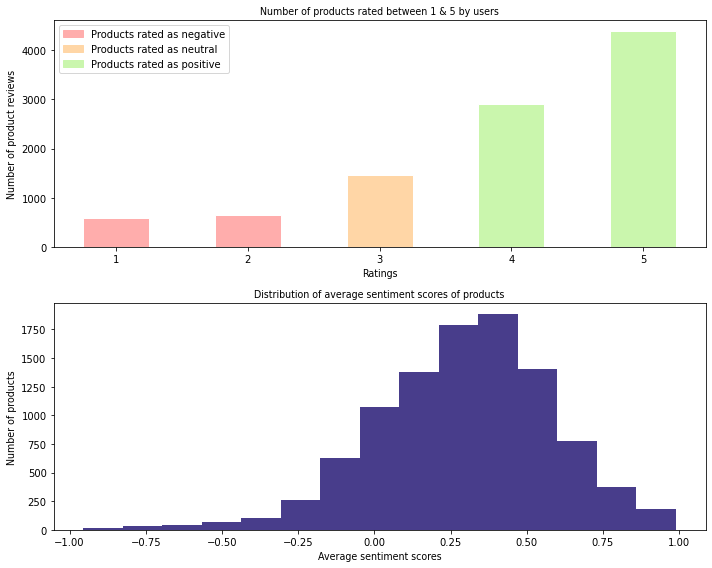

In [17]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
classlabels = ['1','2','3','4','5']
classCount = [len(df1[df1.label == 1]),
              len(df1[df1.label == 2]),
              len(df1[df1.label == 3]),
              len(df1[df1.label == 4]),
              len(df1[df1.label == 5])]

plt.bar(classlabels,classCount, width= 0.5, align='center',
       color=['#ffadac', '#ffadac', '#ffd6a6', '#caf6ad','#caf6ad'], 
       edgecolor = 'white')
plt.xlabel('Ratings', fontsize=9.5)
plt.ylabel("Number of product reviews", fontsize=9.5)
# Creating the legend of the bars in the plot
plt.title('Number of products rated between 1 & 5 by users', fontsize=9.5)

colors = {'Products rated as negative':'#ffadac', 'Products rated as neutral':'#ffd6a6', 
          'Products rated as positive':'#caf6ad'} 

labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.subplot(2, 1, 2)
df1["vader_sentiment_score"].hist(bins=15, color= "darkslateblue")
plt.xlabel("Average sentiment scores", fontsize=9.5)
plt.ylabel("Number of products", fontsize=9.5)
plt.grid(False)
plt.title("Distribution of average sentiment scores of products", fontsize=9.5)
plt.tight_layout()
plt.savefig("DatafintiHotel_rating_senti.png", facecolor='w')

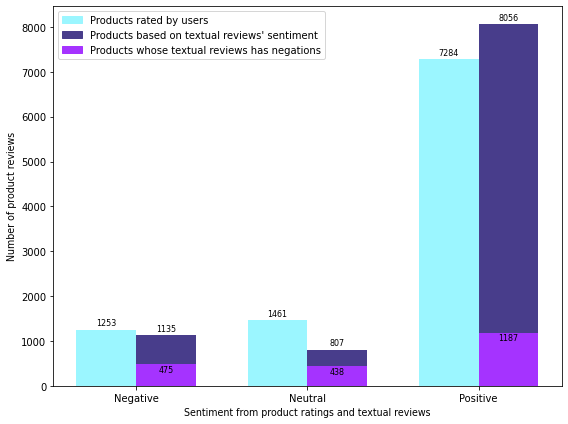

In [63]:
# https://matplotlib.org/3.3.2/gallery/lines_bars_and_markers/barchart.html
labels = ["Negative", "Neutral", "Positive"]
neg = df1[(df1['label']>=1) & (df1['label']<=2)]
neu = df1[df1['label']==3]
pos = df1[(df1['label']>=4) & (df1['label']<=5)]
reviews = [len(neg), len(neu), len(pos)]
reviews_with_negs = [len(neg[neg['vader_negations']>0]), 
                     len(neu[neu["vader_negations"]>0]), 
                     len(pos[pos["vader_negations"]>0])]


neg_senti = df1[df1['vader_sentiment_score']<= -0.05]
neu_senti = df1[(df1['vader_sentiment_score']> -0.05) & (df1['vader_sentiment_score']< 0.05)]
pos_senti = df1[df1['vader_sentiment_score']>= 0.05]
reviews_senti = [len(neg_senti), len(neu_senti), len(pos_senti)]


x = np.arange(len(labels))
width = 0.35  

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width / 2, reviews, width, 
                color='#9bf6ff')
rects2 = ax.bar(x + width / 2, reviews_senti, width, 
                color="darkslateblue")
rects3 = ax.bar(x + width / 2, reviews_with_negs, width, 
                color="#A533FF")

ax.set_ylabel('Number of product reviews', fontsize=9.5)
ax.set_xlabel("Sentiment from product ratings and textual reviews", fontsize=9.5)
ax.set_xticks(x)
ax.set_xticklabels(labels)
# ax.legend(loc=9)

def vanlabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(np.round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -10),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(np.round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)


autolabel(rects1)
autolabel(rects2)
vanlabel(rects3)

colors = {'Products rated by users':'#9bf6ff', "Products based on textual reviews' sentiment":"darkslateblue", 
          "Products whose textual reviews has negations":'#A533FF'} 

labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)


fig.tight_layout()
#plt.legend(loc=2)
plt.savefig('Reviews_Negs_Hotel.png', facecolor='w')

### Music

In [10]:
df2 = pd.read_csv("preprocess_dataset/datasets/preparation_of_datasets/Amazon_Music/new_vader/bert_emb_pca13_senti.csv")
print(df2.shape)
df2.head(2)

(64705, 21)


,user,item,label,reviews,vader_negations,vader_sentiment_score,review_emb1,review_emb2,review_emb3,review_emb4,...,review_emb6,review_emb7,review_emb8,review_emb9,review_emb10,review_emb11,review_emb12,review_emb13,negation_occurrence,sentiment
0,1,1,5,"It's hard to believe ""Memory of Trees"" came ou...",0,0.4333,-0.611239,-1.837591,-0.405854,-0.366546,...,0.863877,0.490165,0.533218,-0.504906,-0.174855,0.204785,-0.042151,0.140633,0,1
1,2,1,5,"A clasically-styled and introverted album, Mem...",1,0.3591,-4.554770,0.934950,-0.298552,-0.206955,...,-0.235875,-0.052247,0.342730,-0.148117,-0.269378,0.097177,0.204526,-0.589852,1,1


In [11]:
df2.describe()

,user,item,label,vader_negations,vader_sentiment_score,review_emb1,review_emb2,review_emb3,review_emb4,review_emb5,review_emb6,review_emb7,review_emb8,review_emb9,review_emb10,review_emb11,review_emb12,review_emb13,negation_occurrence,sentiment
count,64705.000000,64705.000000,64705.000000,64705.000000,64705.000000,64705.000000,64705.000000,64705.000000,64705.000000,64705.000000,64705.000000,64705.000000,64705.000000,64705.000000,64705.000000,64705.000000,64705.000000,64705.000000,64705.000000,64705.000000
mean,2075.383912,1697.101105,4.222533,1.047292,0.307589,0.000011,0.000018,0.000046,0.000010,0.000054,0.000063,0.000020,-0.000011,0.000002,-0.000003,-0.000012,-0.000026,-0.000013,0.511012,1.075002
std,1648.495393,955.856373,1.086079,1.535786,0.251763,3.573892,2.338204,0.971251,0.927124,0.740916,0.623039,0.577026,0.523255,0.502524,0.460674,0.388681,0.376826,0.357470,0.499883,0.289237
min,1.000000,1.000000,1.000000,0.000000,-0.989800,-11.077321,-6.336643,-3.535159,-4.196895,-2.503847,-2.314701,-2.963538,-2.399338,-2.050256,-2.096854,-1.889469,-2.618389,-2.070765,0.000000,0.000000
25%,573.000000,844.000000,4.000000,0.000000,0.158300,-2.589402,-1.531720,-0.618689,-0.577219,-0.470809,-0.399167,-0.359699,-0.363087,-0.324423,-0.309302,-0.268411,-0.244266,-0.232302,0.000000,1.000000
50%,1681.000000,1772.000000,5.000000,1.000000,0.299400,-0.473600,-0.286222,-0.083320,0.006088,-0.009108,-0.012736,0.041025,-0.024178,0.008193,-0.011187,-0.022060,-0.003856,-0.010105,1.000000,1.000000
75%,3425.000000,2433.000000,5.000000,2.000000,0.451200,2.102316,1.165621,0.498541,0.590429,0.445259,0.366681,0.402140,0.344531,0.327690,0.295410,0.248550,0.241690,0.225155,1.000000,1.000000
max,5541.000000,3568.000000,5.000000,36.000000,0.999700,23.095236,21.242971,9.518072,6.481041,7.222156,6.576422,3.250033,2.603696,2.524504,2.144877,2.322898,2.829954,2.457113,1.000000,2.000000


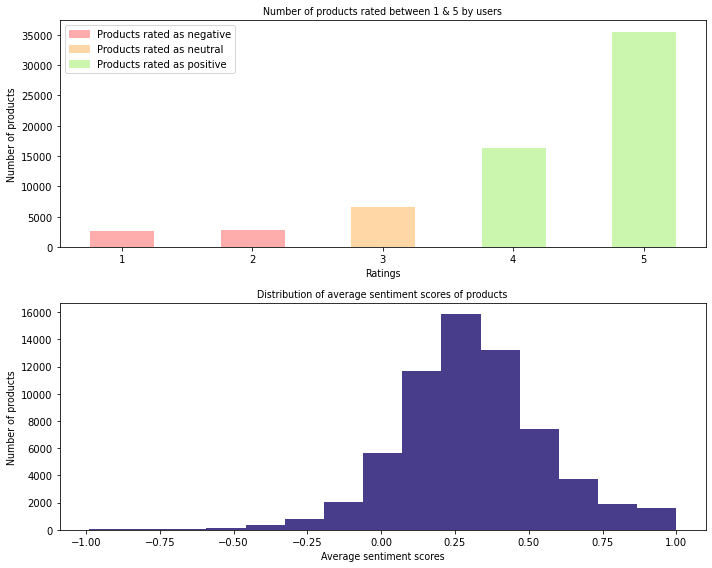

In [18]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
classlabels = ['1','2','3','4','5']
classCount = [len(df2[df2.label == 1]),
              len(df2[df2.label == 2]),
              len(df2[df2.label == 3]),
              len(df2[df2.label == 4]),
              len(df2[df2.label == 5])]

plt.bar(classlabels,classCount, width= 0.5, align='center',
       color=['#ffadac', '#ffadac', '#ffd6a6', '#caf6ad','#caf6ad'], 
       edgecolor = 'white')
plt.xlabel('Ratings', fontsize=9.5)
plt.ylabel("Number of products", fontsize=9.5)
# Creating the legend of the bars in the plot
plt.title('Number of products rated between 1 & 5 by users', fontsize=9.5)

colors = {'Products rated as negative':'#ffadac', 'Products rated as neutral':'#ffd6a6', 
          'Products rated as positive':'#caf6ad'} 

labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)


plt.subplot(2, 1, 2)
df2["vader_sentiment_score"].hist(bins=15, color= "darkslateblue")
plt.xlabel("Average sentiment scores", fontsize=9.5)
plt.ylabel("Number of products", fontsize=9.5)
plt.grid(False)
plt.title("Distribution of average sentiment scores of products", fontsize=9.5)
plt.tight_layout()
plt.savefig("Amazon_DigitalMusic_rating_senti.png", facecolor='w')

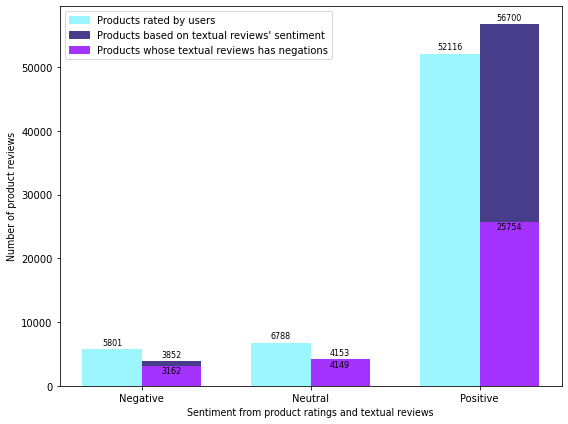

In [61]:
# https://matplotlib.org/3.3.2/gallery/lines_bars_and_markers/barchart.html
labels = ["Negative", "Neutral", "Positive"]
neg = df2[(df2['label']>=1) & (df2['label']<=2)]
neu = df2[df2['label']==3]
pos = df2[(df2['label']>=4) & (df2['label']<=5)]

reviews = [len(neg), len(neu), len(pos)]
reviews_with_negs = [len(neg[neg['vader_negations']>0]), 
                     len(neu[neu["vader_negations"]>0]), 
                     len(pos[pos["vader_negations"]>0])]

neg_senti = df2[df2['vader_sentiment_score']<= -0.05]
neu_senti = df2[(df2['vader_sentiment_score']> -0.05) & (df2['vader_sentiment_score']< 0.05)]
pos_senti = df2[df2['vader_sentiment_score']>= 0.05]
reviews_senti = [len(neg_senti), len(neu_senti), len(pos_senti)]


x = np.arange(len(labels))
width = 0.35  

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width / 2, reviews, width, 
                color='#9bf6ff')
rects2 = ax.bar(x + width / 2, reviews_senti, width, 
                color="darkslateblue")
rects3 = ax.bar(x + width / 2, reviews_with_negs, width, 
                color="#A533FF")

ax.set_ylabel('Number of product reviews', fontsize=9.5)
ax.set_xlabel("Sentiment from product ratings and textual reviews", fontsize=9.5)
ax.set_xticks(x)
ax.set_xticklabels(labels)
# ax.legend(loc=9)

def vanlabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(np.round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -10),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(np.round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)


autolabel(rects1)
autolabel(rects2)
vanlabel(rects3)

colors = {'Products rated by users':'#9bf6ff', "Products based on textual reviews' sentiment":"darkslateblue", 
          "Products whose textual reviews has negations":'#A533FF'} 

labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

fig.tight_layout()
#plt.legend(loc=2)
plt.savefig('Reviews_Negs_Music.png', facecolor='w')

### Video Games

In [12]:
df3 = pd.read_csv("preprocess_dataset/datasets/preparation_of_datasets/Amazon_Video_Games/new_vader/bert_emb_pca12_senti.csv")
print(df3.shape)
df3.head(2)

(231736, 20)


,user,item,label,reviews,vader_negations,vader_sentiment_score,negation_occurrence,review_emb1,review_emb2,review_emb3,review_emb4,review_emb5,review_emb6,review_emb7,review_emb8,review_emb9,review_emb10,review_emb11,review_emb12,sentiment
0,1,1,1,Installing the game was a struggle (because of...,2,-0.0408,1,0.260722,1.943795,0.689574,-1.530184,0.878846,-0.829298,0.172104,0.005599,0.615962,-0.170533,-0.028548,0.006685,2
1,2,1,4,If you like rally cars get this game you will ...,2,0.1910,1,-3.539068,-1.639601,0.242793,1.174925,-0.065639,0.483868,-0.629552,0.370107,-0.286077,-0.193677,0.077917,0.121679,1


In [13]:
df3.describe()

,user,item,label,vader_negations,vader_sentiment_score,negation_occurrence,review_emb1,review_emb2,review_emb3,review_emb4,review_emb5,review_emb6,review_emb7,review_emb8,review_emb9,review_emb10,review_emb11,review_emb12,sentiment
count,231736.000000,231736.000000,231736.000000,231736.000000,231736.000000,231736.000000,231736.000000,231736.000000,231736.000000,231736.000000,231736.000000,231736.000000,231736.000000,231736.000000,231736.000000,231736.000000,231736.000000,231736.000000,231736.000000
mean,10332.231824,5718.392796,4.086404,1.282990,0.271181,0.529197,0.000028,0.000174,0.000243,0.000246,0.000155,0.000262,0.000424,0.000004,-0.000025,0.000030,0.000257,0.000237,1.135275
std,7093.295358,2967.999276,1.202293,2.010254,0.284228,0.499148,3.313384,2.408613,0.975960,0.732187,0.690571,0.545722,0.512233,0.479578,0.436883,0.384275,0.363986,0.346990,0.362488
min,1.000000,1.000000,1.000000,0.000000,-0.998100,0.000000,-9.140912,-7.722720,-4.281234,-2.990343,-2.578352,-2.003057,-2.174199,-2.389055,-2.277367,-2.092088,-2.860038,-2.427300,0.000000
25%,3954.000000,3323.000000,4.000000,0.000000,0.092700,0.000000,-2.575494,-1.571626,-0.648274,-0.485191,-0.462902,-0.360357,-0.299673,-0.315090,-0.292757,-0.243465,-0.189753,-0.218614,1.000000
50%,9650.000000,6012.000000,5.000000,1.000000,0.257500,1.000000,-0.435157,-0.329875,-0.083924,-0.061439,-0.017527,-0.010228,0.013887,0.020646,-0.018979,0.012137,0.004164,0.001874,1.000000
75%,16164.000000,8260.000000,5.000000,2.000000,0.440400,1.000000,2.180930,1.204567,0.544667,0.422923,0.432563,0.340946,0.304225,0.336798,0.271905,0.256375,0.193856,0.220904,1.000000
max,24303.000000,10672.000000,5.000000,44.000000,0.999700,1.000000,16.913778,24.518467,9.640625,8.326509,4.966459,6.232130,9.772841,2.399248,2.865921,2.668067,6.066223,2.786879,2.000000


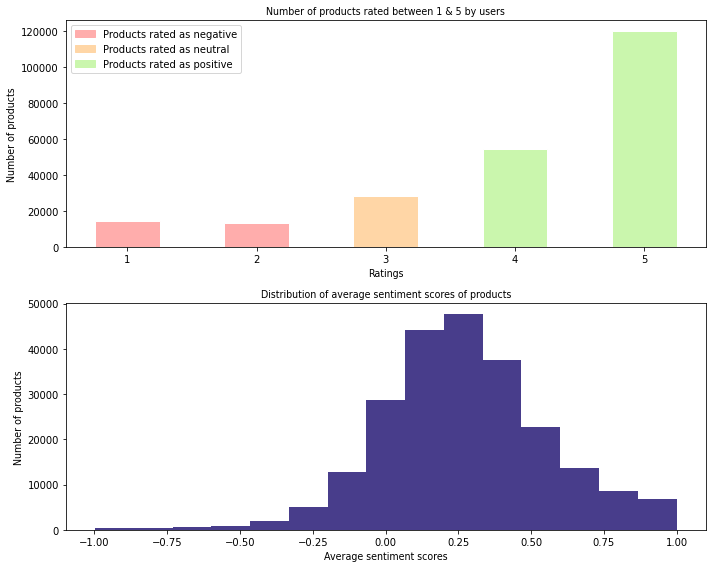

In [19]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
classlabels = ['1','2','3','4','5']
classCount = [len(df3[df3.label == 1]),
              len(df3[df3.label == 2]),
              len(df3[df3.label == 3]),
              len(df3[df3.label == 4]),
              len(df3[df3.label == 5])]

plt.bar(classlabels,classCount, width= 0.5, align='center',
       color=['#ffadac', '#ffadac', '#ffd6a6', '#caf6ad','#caf6ad'], 
       edgecolor = 'white')
plt.xlabel('Ratings', fontsize=9.5)
plt.ylabel("Number of products", fontsize=9.5)
# Creating the legend of the bars in the plot
plt.title('Number of products rated between 1 & 5 by users', fontsize=9.5)

colors = {'Products rated as negative':'#ffadac', 'Products rated as neutral':'#ffd6a6', 
          'Products rated as positive':'#caf6ad'} 

labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.subplot(2, 1, 2)
df3["vader_sentiment_score"].hist(bins=15, color= "darkslateblue")
plt.xlabel("Average sentiment scores", fontsize=9.5)
plt.ylabel("Number of products", fontsize=9.5)
plt.grid(False)
plt.title("Distribution of average sentiment scores of products", fontsize=9.5)
plt.tight_layout()
plt.savefig("Amazon_VideoGames_rating_senti.png", facecolor='w')

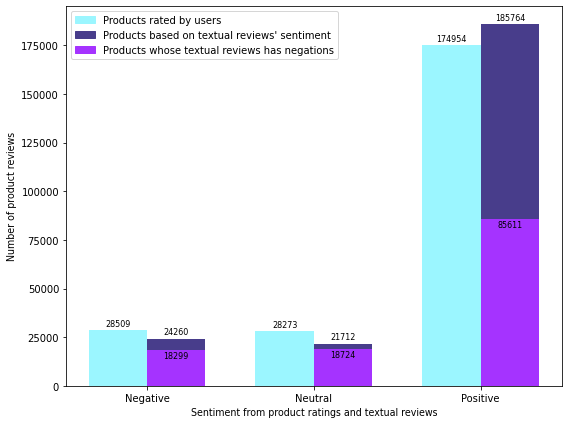

In [62]:
# https://matplotlib.org/3.3.2/gallery/lines_bars_and_markers/barchart.html
labels = ["Negative", "Neutral", "Positive"]
neg = df3[(df3['label']>=1) & (df3['label']<=2)]
neu = df3[df3['label']==3]
pos = df3[(df3['label']>=4) & (df3['label']<=5)]

reviews = [len(neg), len(neu), len(pos)]
reviews_with_negs = [len(neg[neg['vader_negations']>0]), 
                     len(neu[neu["vader_negations"]>0]), 
                     len(pos[pos["vader_negations"]>0])]

neg_senti = df3[df3['vader_sentiment_score']<= -0.05]
neu_senti = df3[(df3['vader_sentiment_score']> -0.05) & (df3['vader_sentiment_score']< 0.05)]
pos_senti = df3[df3['vader_sentiment_score']>= 0.05]
reviews_senti = [len(neg_senti), len(neu_senti), len(pos_senti)]


x = np.arange(len(labels))
width = 0.35  

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width / 2, reviews, width, 
                color='#9bf6ff')
rects2 = ax.bar(x + width / 2, reviews_senti, width, 
                color="darkslateblue")
rects3 = ax.bar(x + width / 2, reviews_with_negs, width, 
                color="#A533FF")

ax.set_ylabel('Number of product reviews', fontsize=9.5)
ax.set_xlabel("Sentiment from product ratings and textual reviews", fontsize=9.5)
ax.set_xticks(x)
ax.set_xticklabels(labels)
# ax.legend(loc=9)

def vanlabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(np.round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -10),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)
    
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(np.round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)
        

autolabel(rects1)
autolabel(rects2)
vanlabel(rects3)

colors = {'Products rated by users':'#9bf6ff', "Products based on textual reviews' sentiment":"darkslateblue", 
          "Products whose textual reviews has negations":'#A533FF'} 

labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)


fig.tight_layout()
#plt.legend(loc=2)
plt.savefig('Reviews_Negs_Games.png', facecolor='w')